# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List

# My useful function

In [2]:
# Random n distinct number in range [start, end)
def distinct_random(start:int , end: int, n: int) -> List[int]:
    a = np.arange(start, end, dtype=int)
    np.random.shuffle(a)
    return a[:n]
# Euclidian Distance
def euclid_distance(x: np.array, y: np.array) -> float:
    return np.sqrt(np.dot(x-y, x-y))

# Clustering

In [3]:
# Define dataframe
df = pd.DataFrame()
df['x'] = [1, 3, 2, 8, 6, 7, -3, -2, -7]
df['y'] = [2, 3, 2, 8, 6, 7, -3, -4, -7]

[]

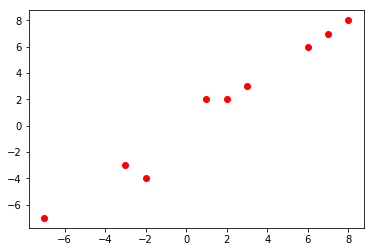

In [4]:
# Plotting Data
plt.scatter(df['x'], df['y'], color='red')
plt.plot()

In [24]:
# K Means Implementation
def train_kmean(df: pd.DataFrame, k: int, start_points=None):
    if not start_points or len(start_points) != k:
        start_points = distinct_random(0, df.shape[0], k)
    
    # Numpy array of data
    data = df.values
    
    # Getting centroid of data
    centroids = [data[i] for i in start_points[:]]
    print('initial centroid:', centroids)
    
    should_iterate = True
    while should_iterate:
        cluster = [[] for i in range(k)]
        # Assign point to cluster
        for point in data:
            min_index = np.argmin(list(map(lambda x: euclid_distance(point, x), centroids)))
            cluster[min_index].append(point)
        # calculate new centroid from mean
        new_centroids = [np.array(c).mean(axis=0) for c in cluster]
        print('cluster:', cluster)
        print('new centroid:', new_centroids)
        print()
        should_iterate = False
        for i in range(k):
            if (not np.array_equal(centroids[i], new_centroids[i])):
                should_iterate = True
        centroids = new_centroids
    return np.array(list(map(lambda x: np.array(x), cluster)))

## T4

initial centroid: [array([3, 3]), array([2, 2]), array([-3, -3])]
cluster: [[array([3, 3]), array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([6., 6.]), array([1.5, 2. ]), array([-4.        , -4.66666667])]
cluster: [[array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([3, 3]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([7., 7.]), array([2.        , 2.33333333]), array([-4.        , -4.66666667])]
cluster: [[array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([3, 3]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([7., 7.]), array([2.        , 2.33333333]), array([-4.        , -4.66666667])]
[[[ 8  8]
  [ 6  6]
  [ 7  7]]

 [[ 1  2]
  [ 3  3]
  [ 2  2]]

 [[-3 -3]
  [-2 -4]
  [-7 -7]]]


[]

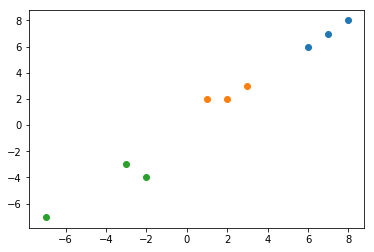

In [22]:
result = train_kmean(df, 3, [1, 2, 6])
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()

## T5

initial centroid: [array([-3, -3]), array([2, 2]), array([-7, -7])]
cluster: [[array([-3, -3]), array([-2, -4])], [array([1, 2]), array([3, 3]), array([2, 2]), array([8, 8]), array([6, 6]), array([7, 7])], [array([-7, -7])]]
new centroid: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]

cluster: [[array([-3, -3]), array([-2, -4])], [array([1, 2]), array([3, 3]), array([2, 2]), array([8, 8]), array([6, 6]), array([7, 7])], [array([-7, -7])]]
new centroid: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]

[array([[-3, -3],
       [-2, -4]])
 array([[1, 2],
       [3, 3],
       [2, 2],
       [8, 8],
       [6, 6],
       [7, 7]])
 array([[-7, -7]])]


[]

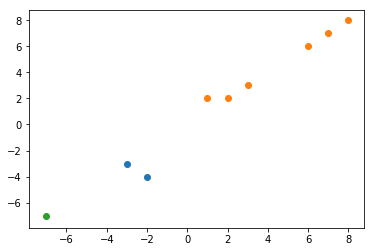

In [26]:
result = train_kmean(df, 3, [6, 2, 8])
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()

initial centroid: [array([2, 2]), array([-2, -4]), array([7, 7]), array([1, 2]), array([-7, -7])]
new centroid: [array([2.5, 2.5]), array([-2.5, -3.5]), array([7., 7.]), array([1., 2.]), array([-7., -7.])]
new centroid: [array([2.5, 2.5]), array([-2.5, -3.5]), array([7., 7.]), array([1., 2.]), array([-7., -7.])]
[array([[3, 3],
       [2, 2]]) array([[-3, -3],
       [-2, -4]])
 array([[8, 8],
       [6, 6],
       [7, 7]]) array([[1, 2]])
 array([[-7, -7]])]


[]

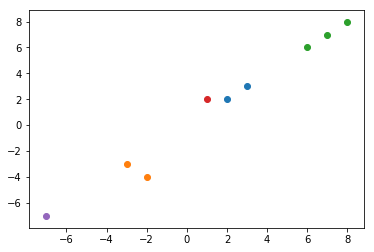

In [20]:
result = train_kmean(df, 5)
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()